In [75]:
# Import libraries
# import contextily as cx
from datetime import datetime
import geopandas as gpd
import geodatasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
# Download the 311 complaints about syringes
syringe_complaints = pd.read_csv('https://data.cityofnewyork.us/resource/erm2-nwe9.csv?descriptor=Syringes&$limit=50000')
syringe_complaints.head(2)

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location
0,64443980,2025-03-23T09:10:30.000,NaN,DSNY,Department of Sanitation,Dirty Condition,Syringes,Sidewalk,10018.0,434 WEST 38 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.756596,-73.996127,"\n, \n(40.75659591114857, -73.99612698908115)"
1,64438854,2025-03-23T08:20:21.000,NaN,DSNY,Department of Sanitation,Dirty Condition,Syringes,Sidewalk,10463.0,WEST 239 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Examine the data types
syringe_complaints.dtypes

,0
unique_key,int64
created_date,object
closed_date,object
agency,object
agency_name,object
complaint_type,object
descriptor,object
location_type,object
incident_zip,float64
incident_address,object


In [6]:
# Convert created_date from an object to a date
syringe_complaints['created_date'] = pd.to_datetime(syringe_complaints['created_date'])

In [7]:
# Extract month and year from created_date
syringe_complaints['created_month'] = syringe_complaints['created_date'].dt.month
syringe_complaints['created_year'] = syringe_complaints['created_date'].dt.year

In [8]:
# Look for missing values
syringe_complaints.isna().sum()

,0
unique_key,0
created_date,0
closed_date,18
agency,0
agency_name,0
complaint_type,0
descriptor,0
location_type,0
incident_zip,1
incident_address,1


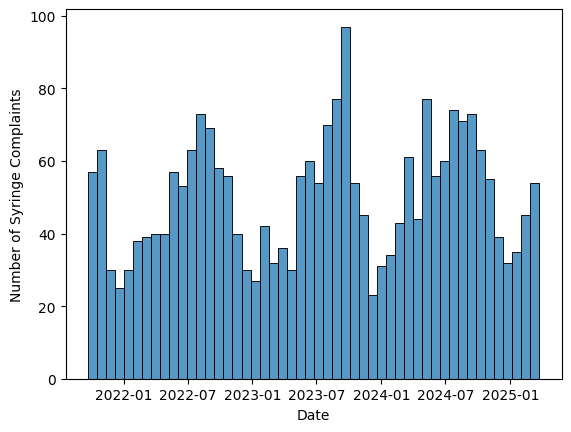

In [9]:
# Make a plot to show the frequency of syringe complaints
ax = sns.histplot(data=syringe_complaints['created_date'], bins = 50)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Syringe Complaints')
plt.show()

Interesting finding: syringe complaints appear to peak at similar times each year!

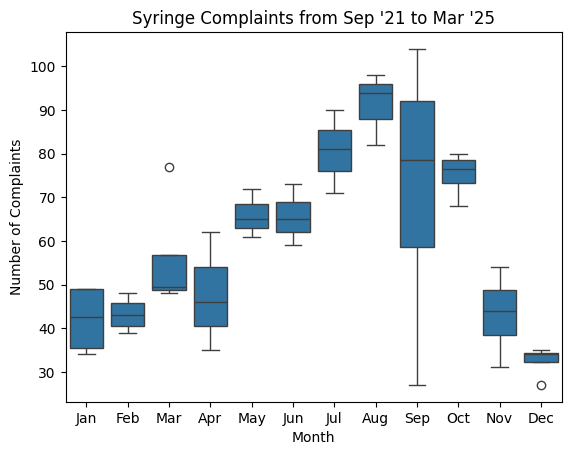

In [10]:
# Make a boxplot to show the number of syringe complaints each month
ax = sns.boxplot(data = syringe_complaints.groupby(['created_year', 'created_month'])['created_date'].agg(complaint_count = 'count').reset_index(),
                 x = 'created_month',
                 y = 'complaint_count')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Complaints')
plt.title('Syringe Complaints from Sep \'21 to Mar \'25')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

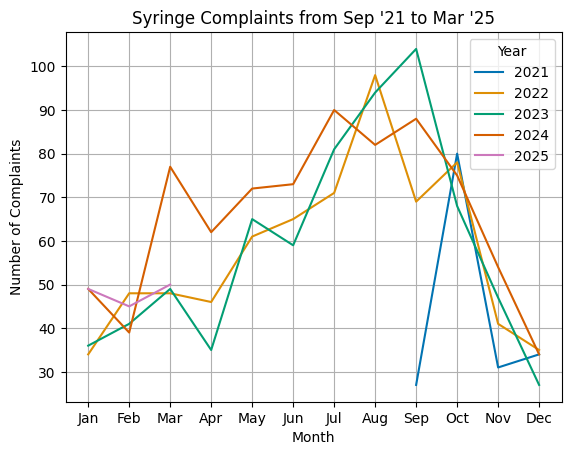

In [11]:
# Make a lineplot of the number of syringe complaints each month, with a different line pear year
ax = sns.lineplot(data = syringe_complaints.groupby(['created_year', 'created_month'])['created_date'].agg(complaint_count = 'count').reset_index(),
                  x = 'created_month',
                  y = 'complaint_count',
                  hue = 'created_year',
                  palette = 'colorblind')
plt.xlabel('Month')
plt.ylabel('Number of Complaints')
plt.title('Syringe Complaints from Sep \'21 to Mar \'25')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(True)
plt.show()

In [12]:
# Download the sharps dropoff site data
dropoff_sites = pd.read_csv('https://data.cityofnewyork.us/resource/edk2-vkjh.csv')
dropoff_sites.head(2)

,borough,ntaname,site_type,sitename,zipcode,phonenum,days_hours,address,borocd,notes,...,councildist,senate_district,_congress_district,assembly_district,police_precints,bbl,bin,latitude,longitude,point
0,Bronx,Norwood,SYRINGE/SHARPS Drop-off,North Central Bronx Hospital,10467,718-918-5000,24/7,"3424 Kossuth Ave, Bronx, NY 10467",207,Lobby,...,11,33,15,81,52,2.033270e+09,2017787.0,40.880432,-73.881204,POINT (-73.881205418129 40.8804402931774)
1,Queens,Flushing-Willets Point,SYRINGE/SHARPS Drop-off,Union Plaza Care Center,11354,718-670-0765,10am-2pm,"33-23 Union St. Flushing, NY 11354",407,Lobby,...,20,16,6,40,109,4.049810e+09,4112550.0,40.767323,-73.826924,POINT (-73.8269253950036 40.7673312732314)


In [13]:
# Examine the data types
dropoff_sites.dtypes

,0
borough,object
ntaname,object
site_type,object
sitename,object
zipcode,int64
phonenum,object
days_hours,object
address,object
borocd,int64
notes,object


In [14]:
# Look for missing values
dropoff_sites.isna().sum()

,0
borough,0
ntaname,0
site_type,0
sitename,0
zipcode,0
phonenum,153
days_hours,153
address,0
borocd,0
notes,153


In [17]:
# Look at the values in the 'days_hours' column
dropoff_sites['days_hours'].value_counts()

,count
days_hours,
24/7,26
Monday-Friday 9am-5pm,19
9am-5pm,14
Monday-Friday 8am-4pm,7
10am-4pm,4
...,...
Monday-Thursday 10am-3pm,1
Monday-Sunday 11am-1pm,1
"Monday, Tuesday, Friday 9am-5pm; Wednesday 10AM-5PM; Thursday 9AM-7PM",1


I would like to parse these values into something more quantitative, like hours open per month. However, I will come back to that later.

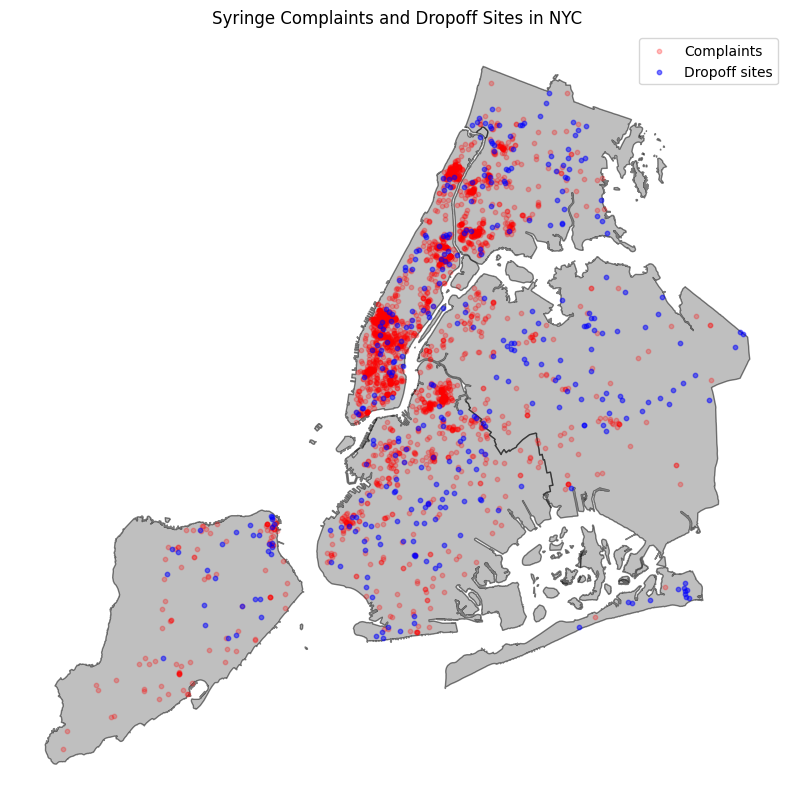

In [91]:
# Load map of NYC for plotting
# CRS = 2263 (NAD83 / New York Long Island (ftUS))
nyc = gpd.read_file(geodatasets.get_path('nybb'))

# Make GeoDataFrames from the syringe_complaints and dropoff_sites DataFrames into
# Not projecting
syringe_complaints_geo = gpd.GeoDataFrame(syringe_complaints, geometry = gpd.points_from_xy(syringe_complaints.longitude, syringe_complaints.latitude), crs = 'EPSG:4326')
dropoff_sites_geo = gpd.GeoDataFrame(dropoff_sites, geometry = gpd.points_from_xy(dropoff_sites.longitude, dropoff_sites.latitude), crs = 'EPSG:4326')

# Change CRS to 2263, projecting coord
syringe_complaints_geo = syringe_complaints_geo.to_crs(2263)
dropoff_sites_geo = dropoff_sites_geo.to_crs(2263)

# Plot the map of NYC
ax = nyc.plot(figsize = (10, 10), alpha = 0.5, color = 'gray', edgecolor = 'k')

# Plot the syringe complaints and dropoff locations
syringe_complaints_geo.plot(ax = ax, markersize = 10, alpha = 0.25, color = 'red')
dropoff_sites_geo.plot(ax = ax, markersize = 10, alpha = 0.5, color = 'blue')

# Format the plot
ax.set_axis_off()
ax.legend(['Complaints', 'Dropoff sites'])
plt.title('Syringe Complaints and Dropoff Sites in NYC')
plt.show()

In [104]:
# Load city council districts shape file
ccd = gpd.read_file('/Districts 2022-10-06.shp').to_crs(epsg=2263)

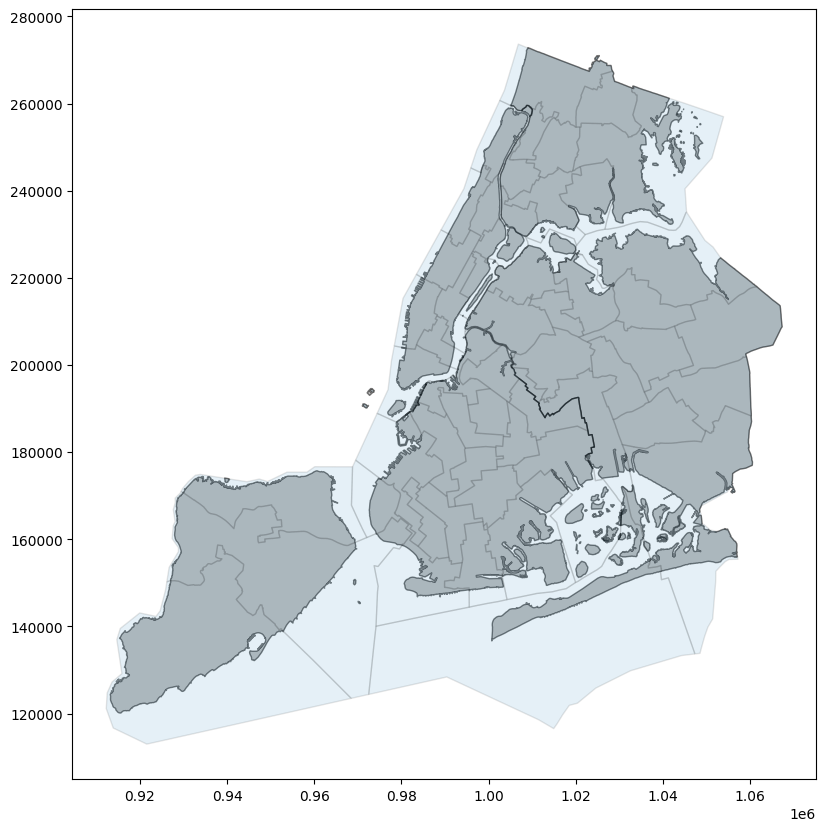

In [105]:
# Try plotting this?
ax = nyc.plot(figsize = (10, 10), alpha = 0.5, color = 'gray', edgecolor = 'k')
ccd.plot(ax = ax, edgecolor = 'k', alpha = 0.1)
plt.show()